### LSTM - Input: 'Close/Last', 'SMA', 'MACD', 'Signal_Line', 'RSI'

In [30]:
import pandas as pd

# Load the data
data = pd.read_csv("C:\\Users\DELL\Downloads\HistoricalData_1717138717541.csv")

# Check for missing values
print(data.isnull().sum())

# Fill missing values or drop rows with missing values
data.fillna(method='ffill', inplace=True)  # forward fill
data.dropna(inplace=True)  # drop any remaining NaNs


Date          0
Close/Last    0
COMP          0
NATS          0
MSCI          0
dtype: int64


C:\Users\DELL\AppData\Local\Temp\ipykernel_19660\4263820463.py:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)  # forward fill


In [31]:
data['Date'] = pd.to_datetime(data['Date'])

# Tạo các cột phụ để sắp xếp theo năm, tháng, ngày
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

# Sắp xếp DataFrame theo năm, sau đó tháng, và cuối cùng là ngày
data.sort_values(['Year', 'Month', 'Day'], inplace=True)

# Xóa các cột phụ nếu không cần thiết
data.drop(columns=['Year', 'Month', 'Day'], inplace=True)
data

,Date,Close/Last,COMP,NATS,MSCI
1257,2019-06-03,4170.02,7333.02,835.84,2615.02
1256,2019-06-04,4320.98,7527.12,863.30,2671.61
1255,2019-06-05,4329.21,7575.48,875.85,2693.60
1254,2019-06-06,4375.45,7615.55,881.34,2709.88
1253,2019-06-07,4435.80,7742.10,894.46,2738.40
...,...,...,...,...,...
4,2024-05-23,10495.82,16736.03,1770.08,5016.81
3,2024-05-24,10549.22,16920.79,1751.27,5051.83
2,2024-05-28,10526.85,17019.88,1739.75,5051.64
1,2024-05-29,10396.40,16920.58,1733.33,5014.18


In [32]:
# Tính toán số lượng dòng cho từng phần
total_rows = len(data)
train_size = int(0.8 * total_rows)
val_size = int(0.1 * total_rows)
test_size = total_rows - train_size - val_size  # Đảm bảo rằng tổng số dòng vẫn bằng total_rows

# Chia DataFrame thành các tập huấn luyện, kiểm tra và kiểm định
data_train = data.iloc[:train_size]
data_val = data.iloc[train_size:train_size + val_size]
data_test = data.iloc[train_size + val_size:]

In [33]:
import numpy as np

# Simple Moving Average
window_size = 20  # example window size
data_train['SMA'] = data_train['Close/Last'].rolling(window=window_size).mean()

# Moving Average Convergence Divergence (MACD)
exp1 = data_train['Close/Last'].ewm(span=12, adjust=False).mean()
exp2 = data_train['Close/Last'].ewm(span=26, adjust=False).mean()
data_train['MACD'] = exp1 - exp2
data_train['Signal_Line'] = data_train['MACD'].ewm(span=9, adjust=False).mean()

# Relative Strength Index (RSI)
delta = data_train['Close/Last'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
data_train['RSI'] = 100 - (100 / (1 + rs))


# Xử lý các giá trị vô hạn hoặc quá lớn
data_train.replace([np.inf, -np.inf], np.nan, inplace=True)
data_train.dropna(how='any', axis=0, inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_19660\2503782476.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['SMA'] = data_train['Close/Last'].rolling(window=window_size).mean()
C:\Users\DELL\AppData\Local\Temp\ipykernel_19660\2503782476.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['MACD'] = exp1 - exp2
C:\Users\DELL\AppData\Local\Temp\ipykernel_19660\2503782476.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

In [34]:
import numpy as np

# Simple Moving Average
window_size = 20  # example window size
data_val['SMA'] = data_val['Close/Last'].rolling(window=window_size).mean()

# Moving Average Convergence Divergence (MACD)
exp1 = data_val['Close/Last'].ewm(span=12, adjust=False).mean()
exp2 = data_val['Close/Last'].ewm(span=26, adjust=False).mean()
data_val['MACD'] = exp1 - exp2
data_val['Signal_Line'] = data_val['MACD'].ewm(span=9, adjust=False).mean()

# Relative Strength Index (RSI)
delta = data_val['Close/Last'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
data_val['RSI'] = 100 - (100 / (1 + rs))

# Xử lý các giá trị vô hạn hoặc quá lớn
data_val.replace([np.inf, -np.inf], np.nan, inplace=True)
data_val.dropna(how='any', axis=0, inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_19660\3418790170.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_val['SMA'] = data_val['Close/Last'].rolling(window=window_size).mean()
C:\Users\DELL\AppData\Local\Temp\ipykernel_19660\3418790170.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_val['MACD'] = exp1 - exp2
C:\Users\DELL\AppData\Local\Temp\ipykernel_19660\3418790170.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

In [35]:
import numpy as np

# Simple Moving Average
window_size = 20  # example window size
data_test['SMA'] = data_test['Close/Last'].rolling(window=window_size).mean()

# Moving Average Convergence Divergence (MACD)
exp1 = data_test['Close/Last'].ewm(span=12, adjust=False).mean()
exp2 = data_test['Close/Last'].ewm(span=26, adjust=False).mean()
data_test['MACD'] = exp1 - exp2
data_test['Signal_Line'] = data_test['MACD'].ewm(span=9, adjust=False).mean()

# Relative Strength Index (RSI)
delta = data_test['Close/Last'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
data_test['RSI'] = 100 - (100 / (1 + rs))


# Xử lý các giá trị vô hạn hoặc quá lớn
data_test.replace([np.inf, -np.inf], np.nan, inplace=True)
data_test.dropna(how='any', axis=0, inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_19660\454854032.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test['SMA'] = data_test['Close/Last'].rolling(window=window_size).mean()
C:\Users\DELL\AppData\Local\Temp\ipykernel_19660\454854032.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test['MACD'] = exp1 - exp2
C:\Users\DELL\AppData\Local\Temp\ipykernel_19660\454854032.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

In [36]:
from sklearn.preprocessing import MinMaxScaler

# Chuẩn hóa các cột giá dựa trên tập huấn luyện và áp dụng cho tập kiểm tra và kiểm định
scaler_price = MinMaxScaler(feature_range=(-1, 1))
price_columns = ['Close/Last', 'SMA', 'MACD', 'Signal_Line', 'RSI']
data_train[price_columns] = scaler_price.fit_transform(data_train[price_columns])
data_val[price_columns] = scaler_price.transform(data_val[price_columns])
data_test_copy=data_test[price_columns]
data_test[price_columns] = scaler_price.transform(data_test[price_columns])

# Chuyển đổi các cột pandas thành mảng NumPy
train_data = data_train[price_columns].values
val_data = data_val[price_columns].values
test_data = data_test[price_columns].values

# Hiển thị kích thước của các tập dữ liệu
print('Training data shape: {}'.format(train_data.shape))
print('Validation data shape: {}'.format(val_data.shape))
print('Test data shape: {}'.format(test_data.shape))

Training data shape: (987, 5)
Validation data shape: (106, 5)
Test data shape: (108, 5)


C:\Users\DELL\AppData\Local\Temp\ipykernel_19660\4137667141.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train[price_columns] = scaler_price.fit_transform(data_train[price_columns])
C:\Users\DELL\AppData\Local\Temp\ipykernel_19660\4137667141.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_val[price_columns] = scaler_price.transform(data_val[price_columns])
C:\Users\DELL\AppData\Local\Temp\ipykernel_19660\4137667141.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

In [37]:
# Training data
seq_len = 30
X_train, y_train = [], []
for i in range(seq_len, len(train_data)):
  X_train.append(train_data[i-seq_len:i]) # Chunks of training data with a length of 128 df-rows
  y_train.append(train_data[:, 0][i]) #Value of 4th column (Close Price) of df-row 128+1
X_train, y_train = np.array(X_train), np.array(y_train)

###############################################################################

# Validation data
X_val, y_val = [], []
for i in range(seq_len, len(val_data)):
    X_val.append(val_data[i-seq_len:i])
    y_val.append(val_data[:, 0][i])
X_val, y_val = np.array(X_val), np.array(y_val)

###############################################################################

# Test data
X_test, y_test = [], []
for i in range(seq_len, len(test_data)):
    X_test.append(test_data[i-seq_len:i])
    y_test.append(test_data[:, 0][i])    
X_test, y_test = np.array(X_test), np.array(y_test)

print( X_train.shape, y_train.shape)
print( X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(957, 30, 5) (957,)
(76, 30, 5) (76,)
(78, 30, 5) (78,)


In [38]:
from tensorflow.keras.layers import LSTM, Dense,Dropout
from tensorflow.keras.models import Sequential

# model = Sequential([
#     LSTM(256),
#     Dropout(0.3),
#     LSTM(256),
#     Dropout(0.3),
#     Dense(1)
# ])
model = Sequential([
    LSTM(256, return_sequences=True),
    Dropout(0.3),
    LSTM(256),
    Dropout(0.3),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_val, y_val), verbose=1)

# Predicting and reversing normalization
predicted_stock_price = model.predict(X_test)
predicted_stock_price = scaler_price.inverse_transform(np.concatenate((predicted_stock_price, np.zeros((len(predicted_stock_price), 4))), axis=1))[:,0]

Epoch 1/100
15/15 [==============================] - 5s 176ms/step - loss: 0.0431 - val_loss: 0.0150
Epoch 2/100
15/15 [==============================] - 2s 130ms/step - loss: 0.0111 - val_loss: 0.0080
Epoch 3/100
15/15 [==============================] - 2s 131ms/step - loss: 0.0079 - val_loss: 0.0063
Epoch 4/100
15/15 [==============================] - 2s 132ms/step - loss: 0.0070 - val_loss: 0.0066
Epoch 5/100
15/15 [==============================] - 2s 133ms/step - loss: 0.0071 - val_loss: 0.0046
Epoch 6/100
15/15 [==============================] - 2s 132ms/step - loss: 0.0065 - val_loss: 0.0044
Epoch 7/100
15/15 [==============================] - 2s 133ms/step - loss: 0.0064 - val_loss: 0.0052
Epoch 8/100
15/15 [==============================] - 2s 136ms/step - loss: 0.0067 - val_loss: 0.0044
Epoch 9/100
15/15 [==============================] - 2s 139ms/step - loss: 0.0064 - val_loss: 0.0038
Epoch 10/100
15/15 [==============================] - 2s 138ms/step - loss: 0.0059 - val_lo

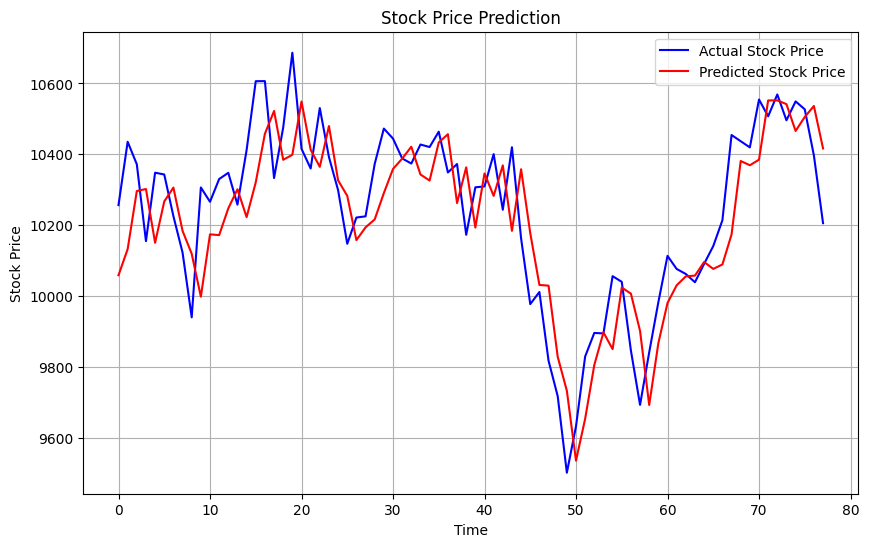

Root Mean Squared Error: 142.90065256225816
Mean Absolute Percentage Error: 0.011707068382714077


c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [39]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# Get actual prices from the last part of the test set
actual_prices = data_test_copy['Close/Last'].values[seq_len:]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(actual_prices, color='blue', label='Actual Stock Price')
plt.plot(predicted_stock_price, color='red', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()

# Calculate RMSE
rmse = mean_squared_error(actual_prices, predicted_stock_price, squared=False)
print(f"Root Mean Squared Error: {rmse}")

mape = mean_absolute_percentage_error(actual_prices, predicted_stock_price)
print(f"Mean Absolute Percentage Error: {mape}")
